In [47]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#read in data

df = pd.read_csv('/Users/cindychong/Desktop/movies.csv')


#look at data. Head means top
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,"927,000.0",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.0","46,998,772.0",Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,"65,000.0",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.0","58,853,106.0",Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,"1,200,000.0",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.0","538,375,067.0",Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,"221,000.0",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.0","83,453,539.0",Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,"108,000.0",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.0","39,846,344.0",Orion Pictures,98.0


In [4]:
#check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
#data types for columns (data clean)
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
#change year

df['correct_year'] = df['released'].astype(str).str[-20:-15]

del df['yearcorrect'] #to delete a column

In [ ]:
df.sort_values(by=['gross'],inplace=False, ascending = False)

In [48]:
pd.set_option('display.float_format', lambda x: '%.0f' % x) #changing from standard deviation to numbers
pd.options.display.float_format = '{:,}'.format # adding commas

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,"1,100,000.0",James Cameron,James Cameron,Sam Worthington,United States,"237,000,000.0","2,847,246,203.0",Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,"903,000.0",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"356,000,000.0","2,797,501,328.0",Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,"1,100,000.0",James Cameron,James Cameron,Leonardo DiCaprio,United States,"200,000,000.0","2,201,647,264.0",Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,"876,000.0",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,"245,000,000.0","2,069,521,700.0",Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,"897,000.0",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"321,000,000.0","2,048,359,754.0",Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,"7,000.0",NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,"58,750.0",NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,"15,000.0",NaN,NaN,120.0


## pd.set_option('display.max_rows', None)

df

In [10]:
#remove duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [11]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,"927,000.0",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.0","46,998,772.0",Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,"65,000.0",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.0","58,853,106.0",Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,"1,200,000.0",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.0","538,375,067.0",Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,"221,000.0",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.0","83,453,539.0",Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,"108,000.0",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.0","39,846,344.0",Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,"7,000.0",NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,"58,750.0",NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,"15,000.0",NaN,NaN,120.0


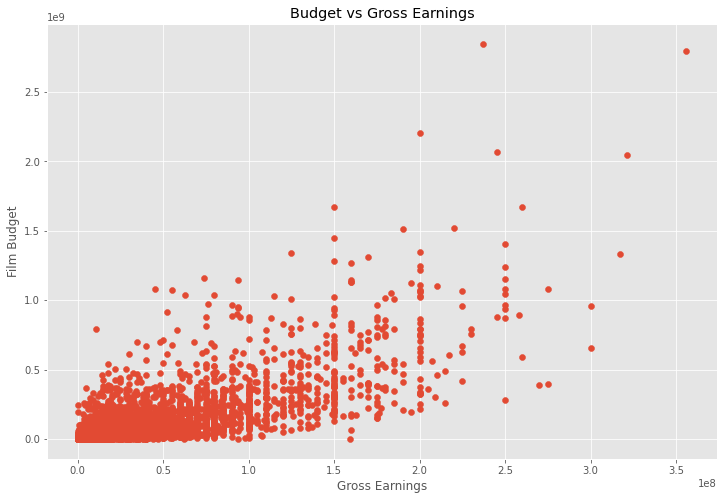

In [16]:
#scatter plot budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Film Budget')

plt.show()


In [19]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,"1,100,000.0",James Cameron,James Cameron,Sam Worthington,United States,"237,000,000.0","2,847,246,203.0",Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,"903,000.0",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"356,000,000.0","2,797,501,328.0",Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,"1,100,000.0",James Cameron,James Cameron,Leonardo DiCaprio,United States,"200,000,000.0","2,201,647,264.0",Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,"876,000.0",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,"245,000,000.0","2,069,521,700.0",Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,"897,000.0",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"321,000,000.0","2,048,359,754.0",Marvel Studios,149.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

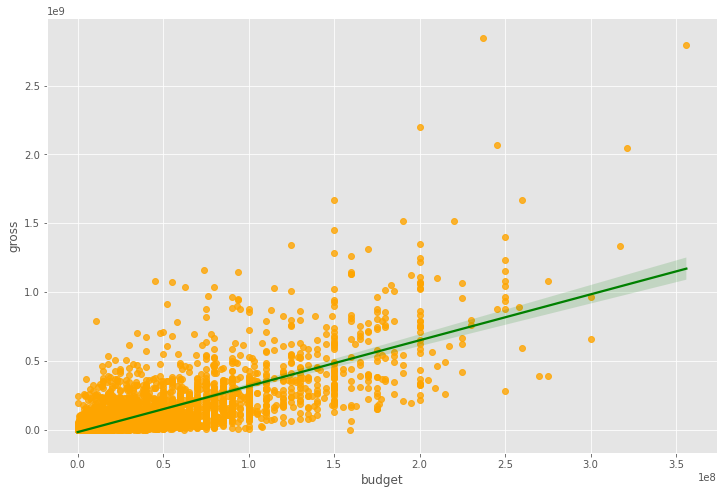

In [34]:
#regression plot using seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color":"orange"}, line_kws={"color":"green"})

In [37]:
#looking at correlations
df.corr(method ='pearson') #only shows numerical no strings #many types of methods pearson is generic

,year,score,votes,budget,gross,runtime
year,1.0,0.09799495786262141,0.2229449274465139,0.32932109960028333,0.25748556615655227,0.12081082340759398
score,0.09799495786262141,1.0,0.40918219212828194,0.07625404432541426,0.18625781119363818,0.3994510823646328
votes,0.2229449274465139,0.40918219212828194,1.0,0.44242948355912876,0.6307565842742959,0.3092119920164506
budget,0.32932109960028333,0.07625404432541426,0.44242948355912876,1.0,0.7403948929894817,0.3204472893535718
gross,0.25748556615655227,0.18625781119363818,0.6307565842742959,0.7403948929894817,1.0,0.24521613203809164
runtime,0.12081082340759398,0.3994510823646328,0.3092119920164506,0.3204472893535718,0.24521613203809164,1.0


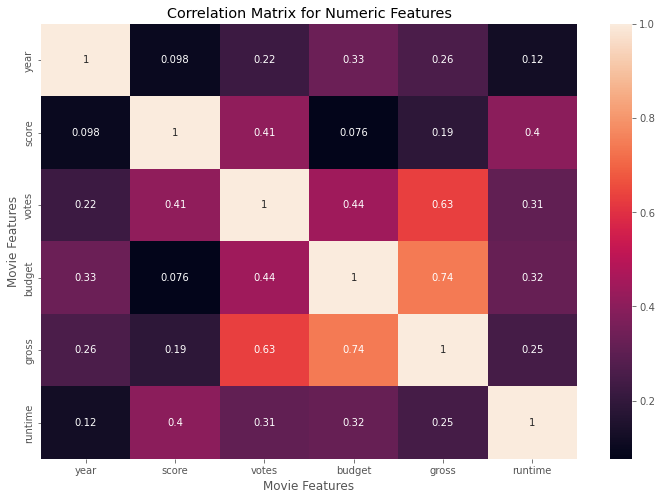

In [41]:
#visualise correlation matrix

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [50]:
#look at company. not numeric but can convert from string into numeric representation


In [51]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,"1,100,000.0",1155,1778,2334,55,"237,000,000.0","2,847,246,203.0",2253,162.0
7445,535,5,0,2019,183,8.4,"903,000.0",162,743,2241,55,"356,000,000.0","2,797,501,328.0",1606,181.0
3045,6896,5,6,1997,704,7.8,"1,100,000.0",1155,1778,1595,55,"200,000,000.0","2,201,647,264.0",2253,194.0
6663,5144,5,0,2015,698,7.8,"876,000.0",1125,2550,524,55,"245,000,000.0","2,069,521,700.0",1540,138.0
7244,536,5,0,2018,192,8.4,"897,000.0",162,743,2241,55,"321,000,000.0","2,048,359,754.0",1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,"7,000.0",NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,"58,750.0",NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,"15,000.0",NaN,-1,120.0


In [58]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,"1,100,000.0",1155,1778,2334,55,"237,000,000.0","2,847,246,203.0",2253,162.0
7445,535,5,0,2019,183,8.4,"903,000.0",162,743,2241,55,"356,000,000.0","2,797,501,328.0",1606,181.0
3045,6896,5,6,1997,704,7.8,"1,100,000.0",1155,1778,1595,55,"200,000,000.0","2,201,647,264.0",2253,194.0
6663,5144,5,0,2015,698,7.8,"876,000.0",1125,2550,524,55,"245,000,000.0","2,069,521,700.0",1540,138.0
7244,536,5,0,2018,192,8.4,"897,000.0",162,743,2241,55,"321,000,000.0","2,048,359,754.0",1606,149.0


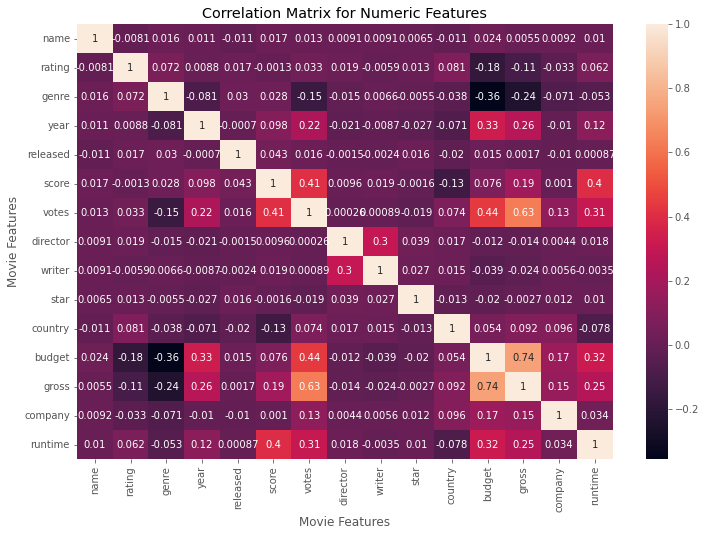

In [52]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [53]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name     name                         1.0
         rating     -0.008068623363832154
         genre        0.01635490010901649
         year        0.011452824170609185
         released   -0.011310714929528655
                             ...         
runtime  country     -0.07841237142903064
         budget        0.3204472893535718
         gross        0.24521613203809164
         company     0.034401810985346885
         runtime                      1.0
Length: 225, dtype: float64

In [55]:
#another way to sort correlation
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   genre     -0.35656448097761007
genre    budget    -0.35656448097761007
         gross      -0.2356502998930211
gross    genre      -0.2356502998930211
rating   budget    -0.17600162893784238
                           ...         
year     year                       1.0
genre    genre                      1.0
rating   rating                     1.0
company  company                    1.0
runtime  runtime                    1.0
Length: 225, dtype: float64

In [57]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

gross     votes      0.6307565842742959
votes     gross      0.6307565842742959
budget    gross      0.7403948929894817
gross     budget     0.7403948929894817
name      name                      1.0
director  director                  1.0
gross     gross                     1.0
budget    budget                    1.0
country   country                   1.0
star      star                      1.0
writer    writer                    1.0
votes     votes                     1.0
score     score                     1.0
released  released                  1.0
year      year                      1.0
genre     genre                     1.0
rating    rating                    1.0
company   company                   1.0
runtime   runtime                   1.0
dtype: float64

In [ ]:
#a correlation is that votes and budgets had highest correlation to gross earnings
#company has low correlation